In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('house_train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratoty Data Analysis

In depth study of dataset and its features. Detecting missing values, outliers, types of features like numerical(continuous or discrete), categorical etc. Doing analysis to find their impact on the target by finding covariance, histograms and various distributions and plots using visualization techniques.

In [3]:
feat_null = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]

In [4]:
for feat in feat_null:
    print(feat,': ',round(dataset[feat].isnull().mean()*100,3),'% missing values')

LotFrontage :  17.74 % missing values
Alley :  93.767 % missing values
MasVnrType :  0.548 % missing values
MasVnrArea :  0.548 % missing values
BsmtQual :  2.534 % missing values
BsmtCond :  2.534 % missing values
BsmtExposure :  2.603 % missing values
BsmtFinType1 :  2.534 % missing values
BsmtFinType2 :  2.603 % missing values
Electrical :  0.068 % missing values
FireplaceQu :  47.26 % missing values
GarageType :  5.548 % missing values
GarageYrBlt :  5.548 % missing values
GarageFinish :  5.548 % missing values
GarageQual :  5.548 % missing values
GarageCond :  5.548 % missing values
PoolQC :  99.521 % missing values
Fence :  80.753 % missing values
MiscFeature :  96.301 % missing values


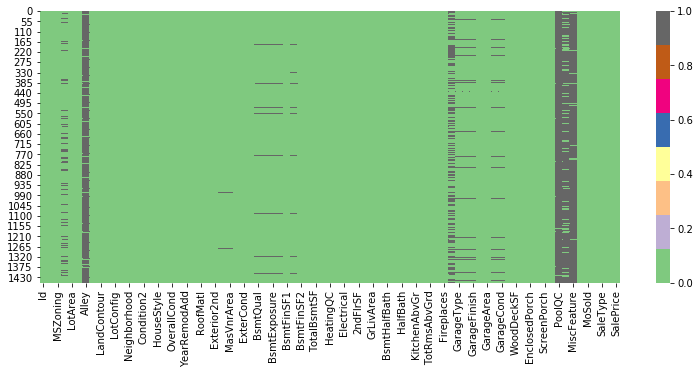

In [5]:
plt.figure(figsize=(13,5))
sns.heatmap(dataset.isnull(),cmap='Accent')

##### checking impact of null values on the target(sale price)

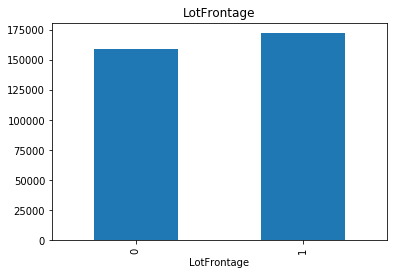

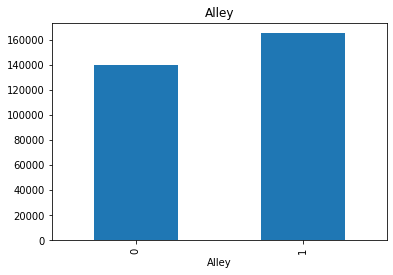

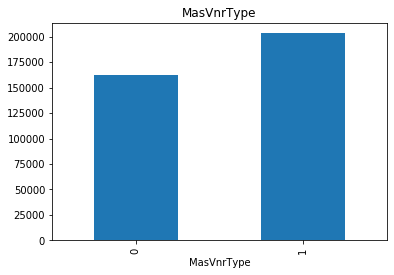

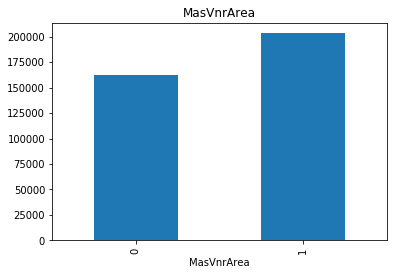

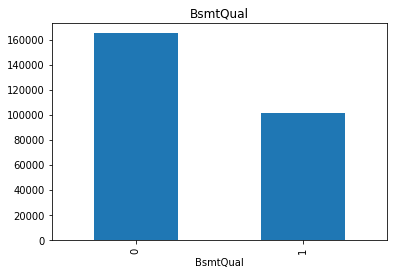

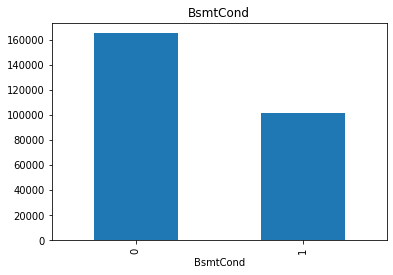

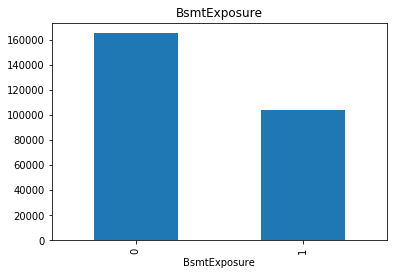

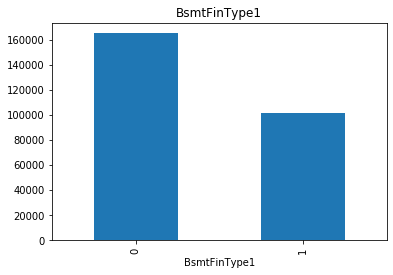

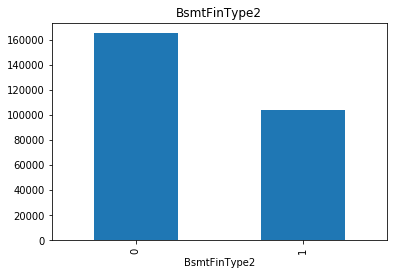

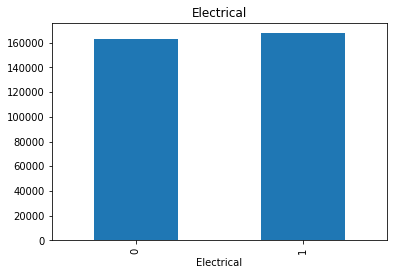

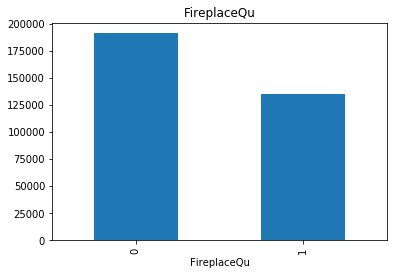

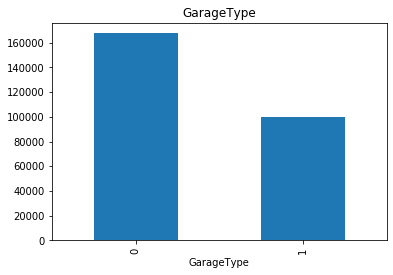

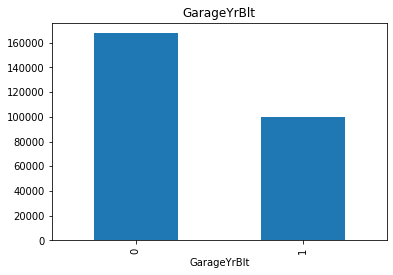

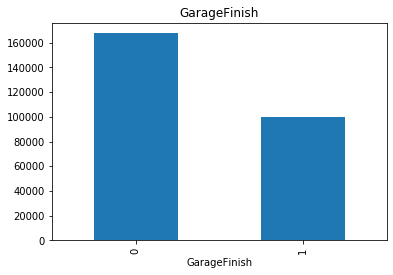

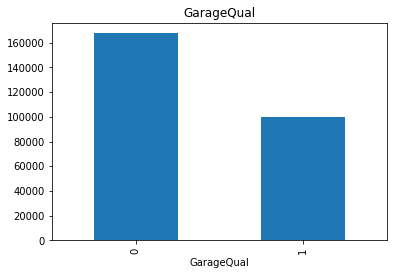

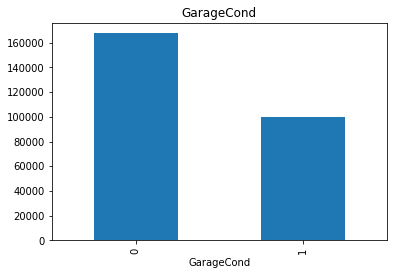

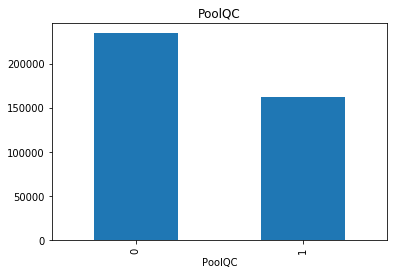

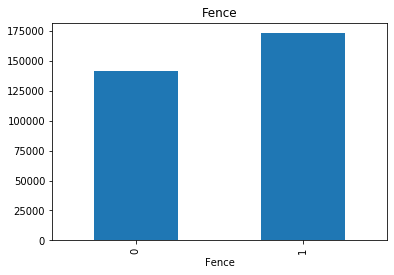

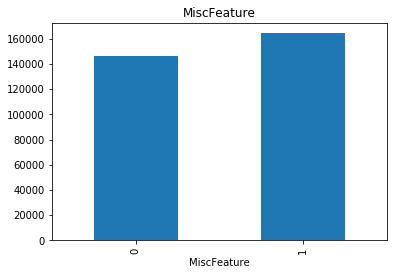

In [6]:
for feat in feat_null:
    data = dataset.copy()
    data[feat] = np.where(dataset[feat].isnull(),1,0)
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.show()

In [7]:
discrete_feat = [feature for feature in dataset.columns if dataset[feature].dtype!='O' and len(dataset[feature].unique())<25]

In [8]:
for feat in discrete_feat:
    print(feat,':',dataset[feat].unique(),':',len(dataset[feat].unique()))

MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] : 15
OverallQual : [ 7  6  8  5  9  4 10  3  1  2] : 10
OverallCond : [5 8 6 7 4 2 3 9 1] : 9
LowQualFinSF : [  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384] : 24
BsmtFullBath : [1 0 2 3] : 4
BsmtHalfBath : [0 1 2] : 3
FullBath : [2 1 3 0] : 4
HalfBath : [1 0 2] : 3
BedroomAbvGr : [3 4 1 2 0 5 6 8] : 8
KitchenAbvGr : [1 2 3 0] : 4
TotRmsAbvGrd : [ 8  6  7  9  5 11  4 10 12  3  2 14] : 12
Fireplaces : [0 1 2 3] : 4
GarageCars : [2 3 1 0 4] : 5
3SsnPorch : [  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304] : 20
PoolArea : [  0 512 648 576 555 480 519 738] : 8
MiscVal : [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500] : 21
MoSold : [ 2  5  9 12 10  8 11  4  1  7  3  6] : 12
YrSold : [2008 2007 2006 2009 2010] : 5


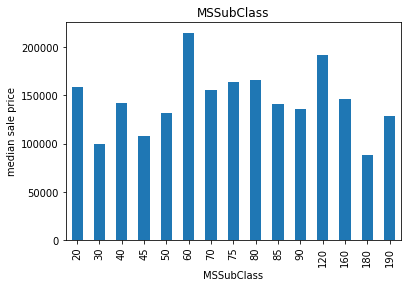

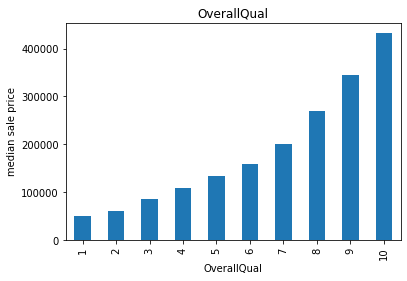

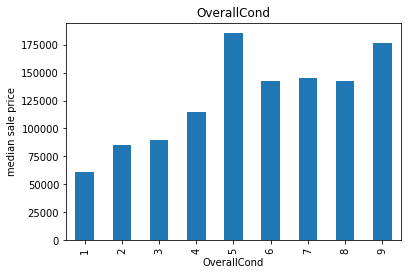

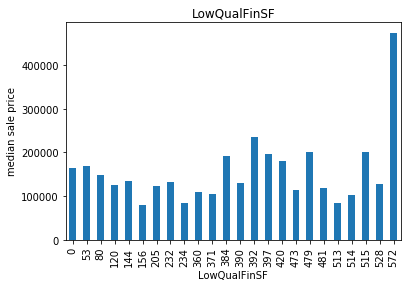

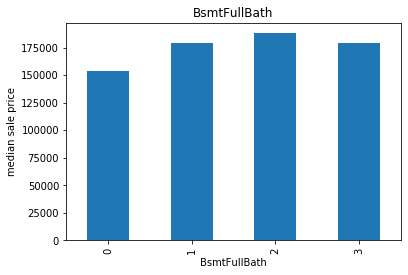

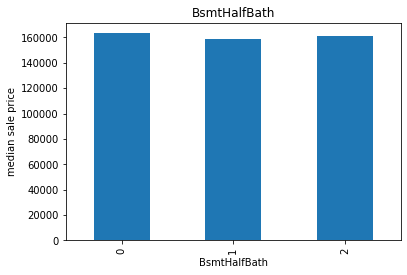

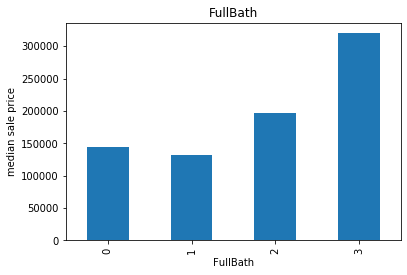

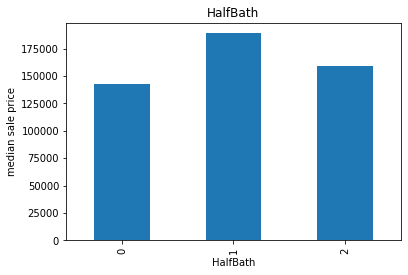

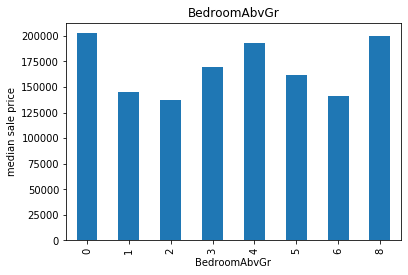

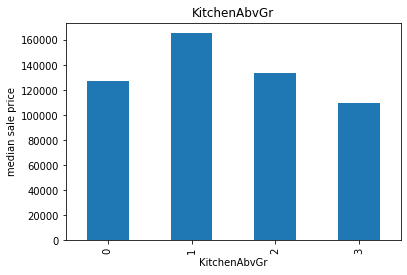

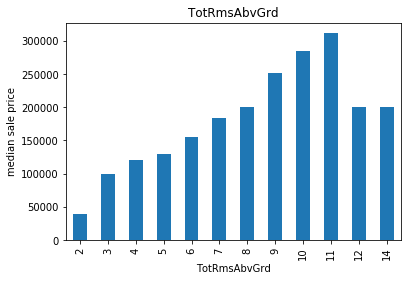

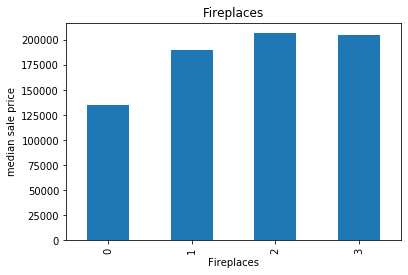

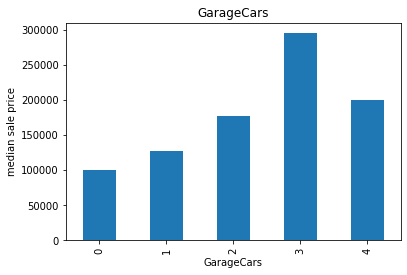

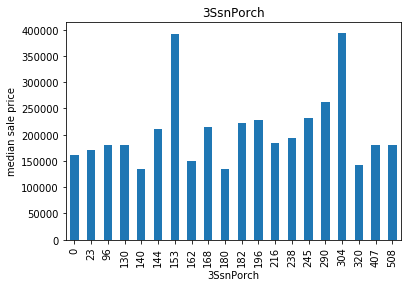

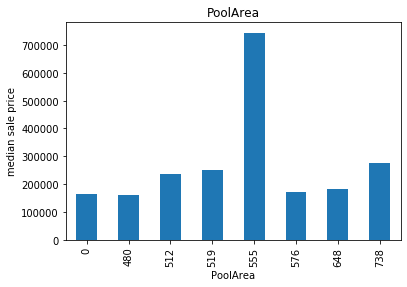

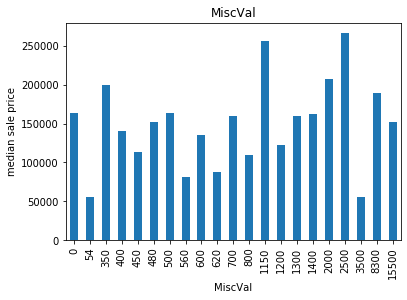

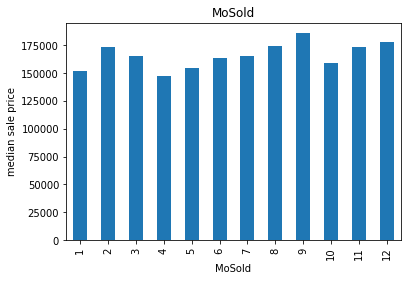

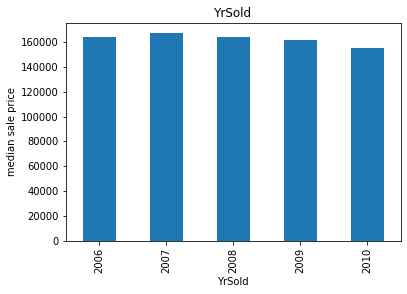

In [9]:
for feat in discrete_feat:
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.xlabel(feat)
    plt.ylabel('median sale price')
    plt.title(feat)
    plt.show()

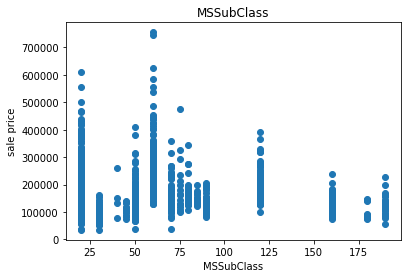

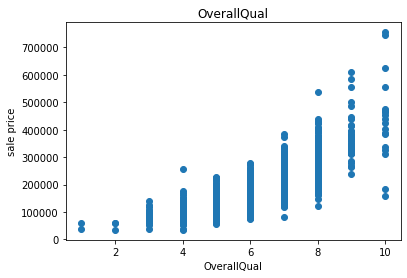

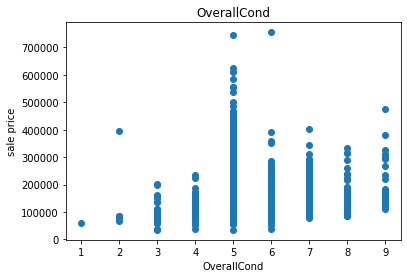

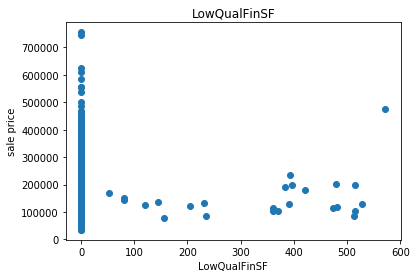

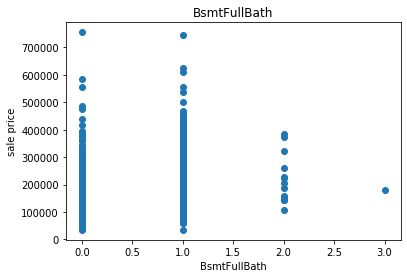

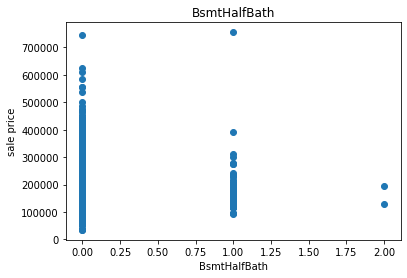

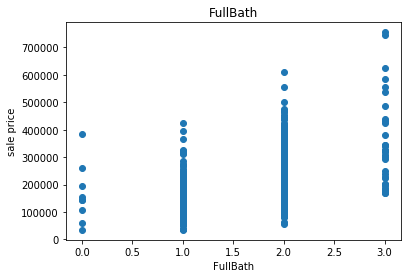

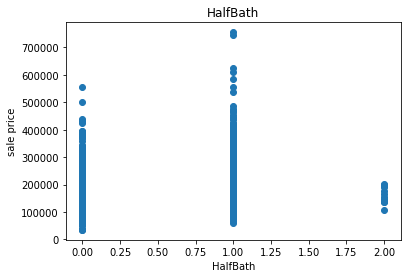

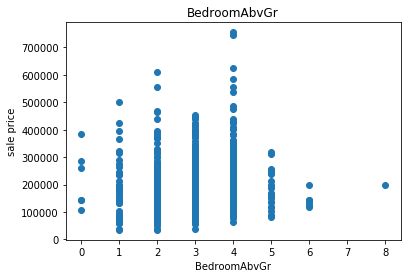

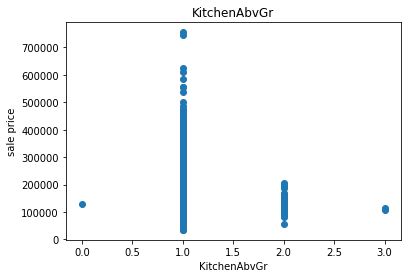

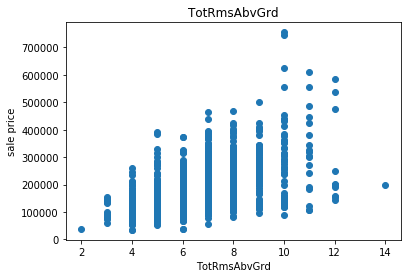

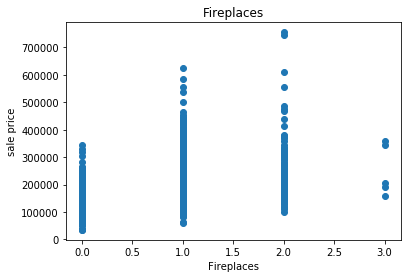

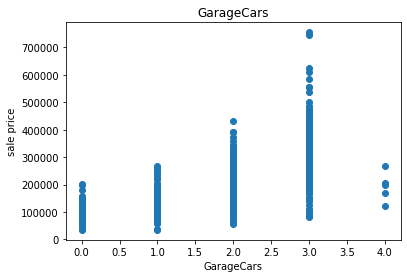

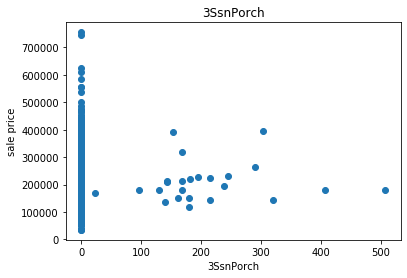

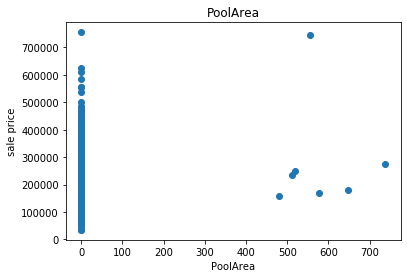

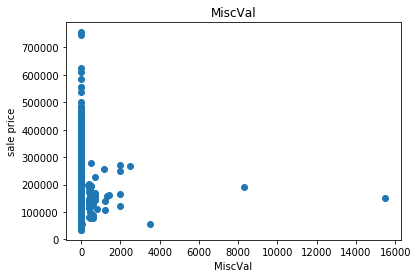

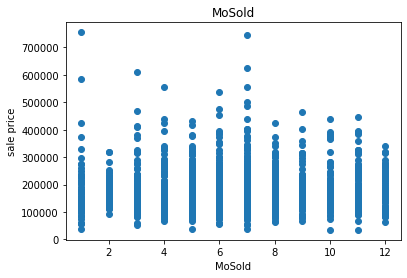

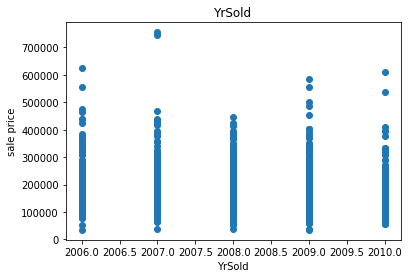

In [10]:
for feat in discrete_feat:
    plt.scatter(dataset[feat],dataset['SalePrice'])
    plt.xlabel(feat)
    plt.ylabel('sale price')
    plt.title(feat)
    plt.show()

In [11]:
year_feat = [feature for feature in dataset.columns if 'Year' in feature or 'Yr' in feature]
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

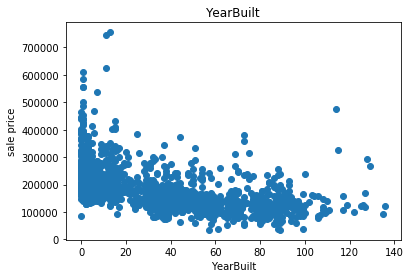

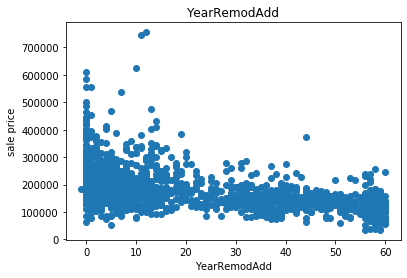

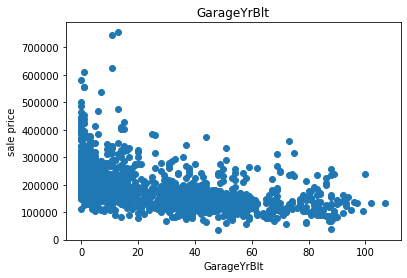

In [12]:
for feat in year_feat:
    data = dataset.copy()
    if feat != 'YrSold':
        data[feat] = dataset['YrSold'] - dataset[feat] 
        plt.scatter(data[feat],data['SalePrice'])
        plt.xlabel(feat)
        plt.ylabel('sale price')
        plt.title(feat)
        plt.show()

In [13]:
continuous_feat = [feature for feature in dataset.columns if dataset[feature].dtype!='O' and feature not in discrete_feat]
continuous_feat

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

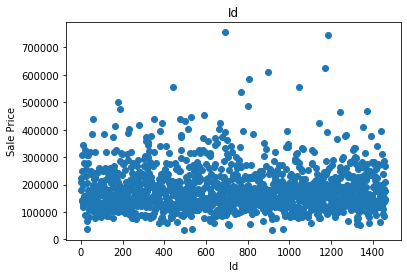

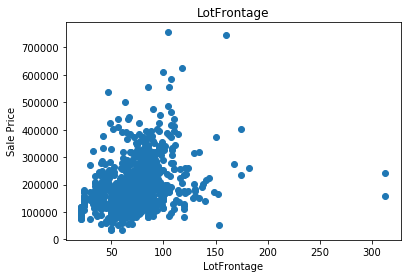

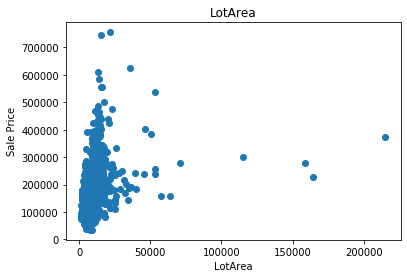

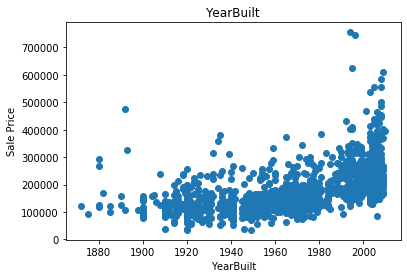

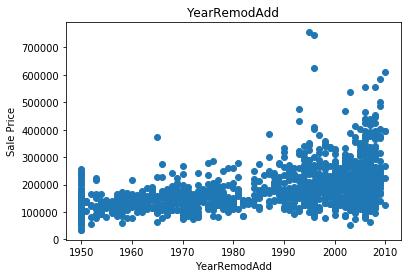

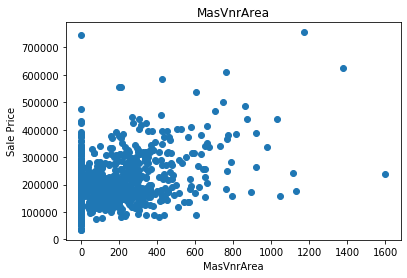

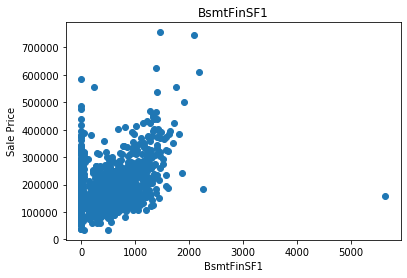

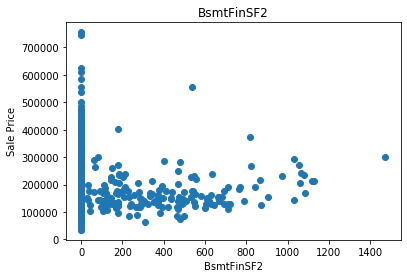

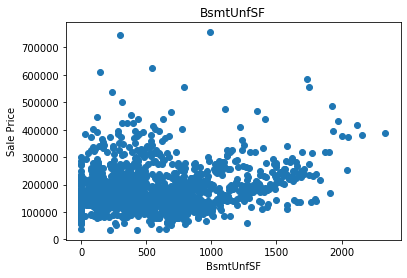

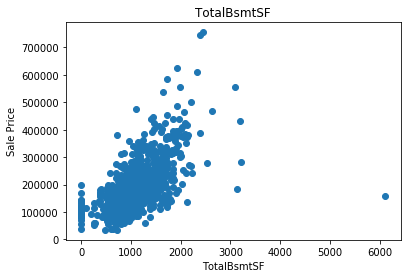

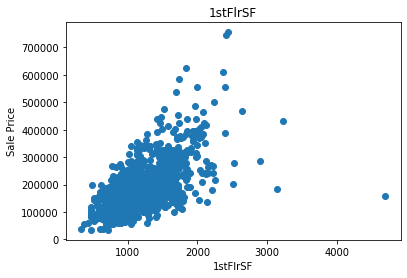

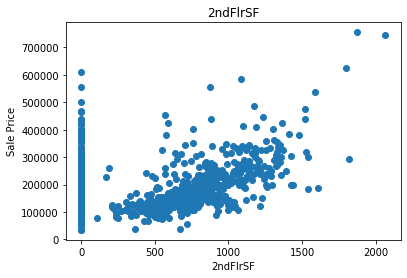

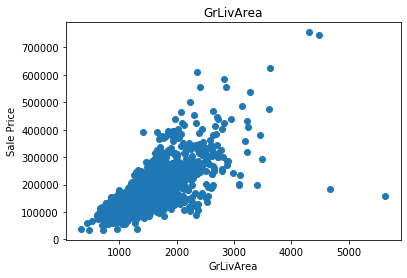

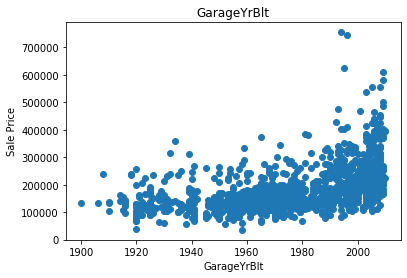

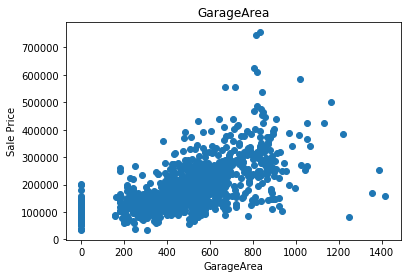

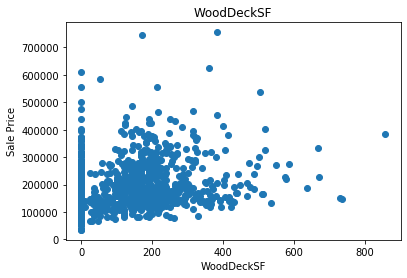

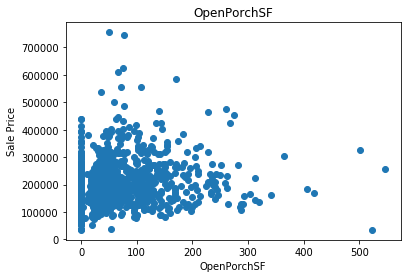

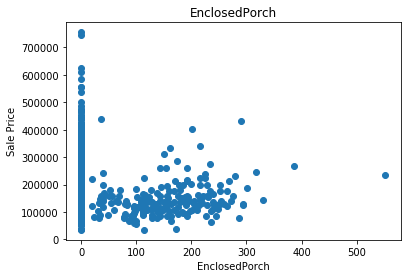

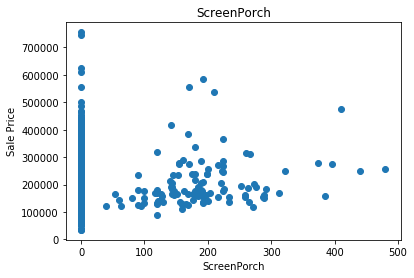

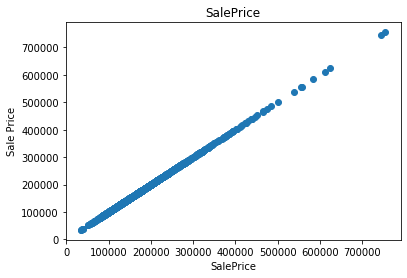

In [14]:
for feat in continuous_feat:
    plt.scatter(dataset[feat],dataset['SalePrice'])
    plt.xlabel(feat)
    plt.ylabel('Sale Price')
    plt.title(feat)
    plt.show()

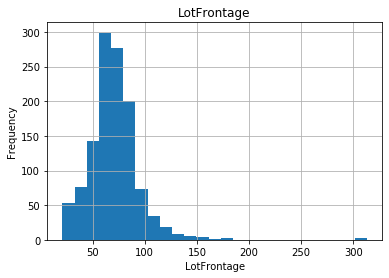

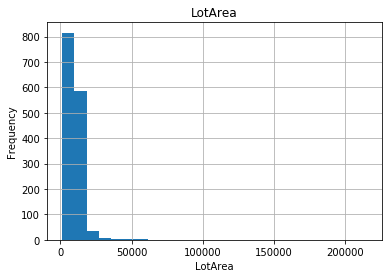

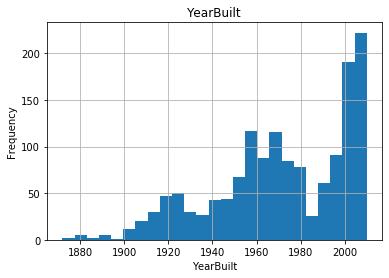

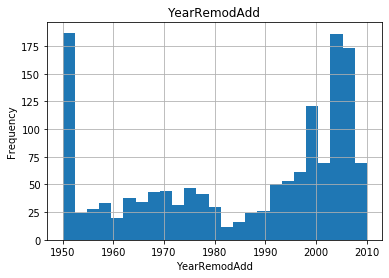

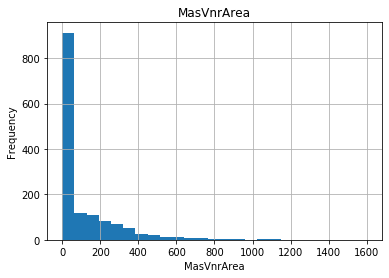

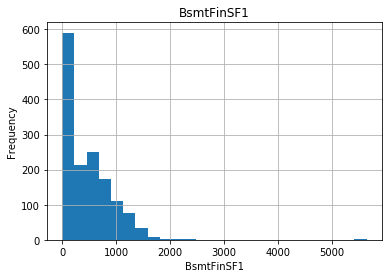

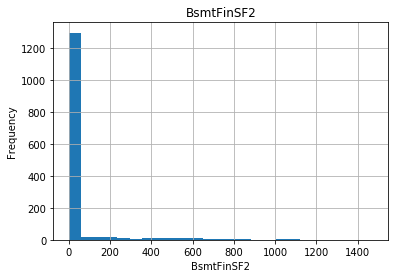

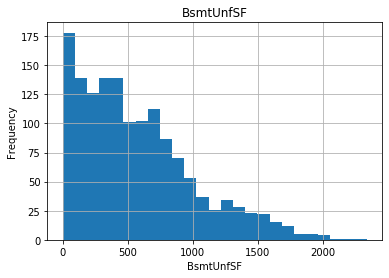

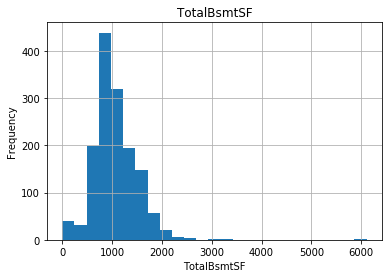

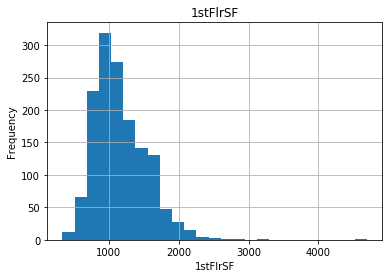

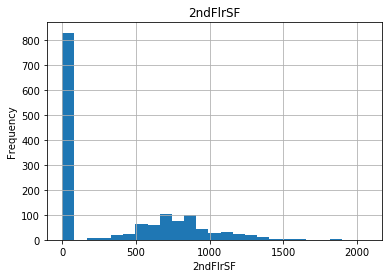

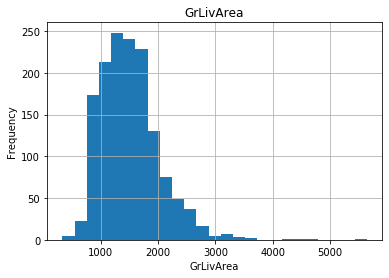

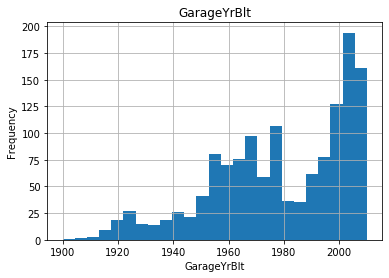

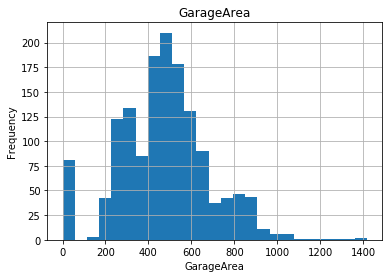

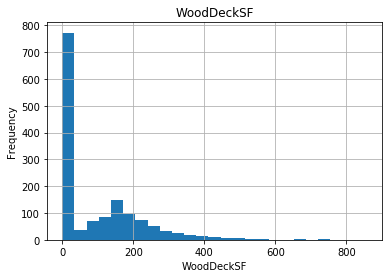

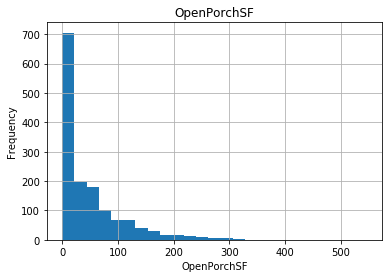

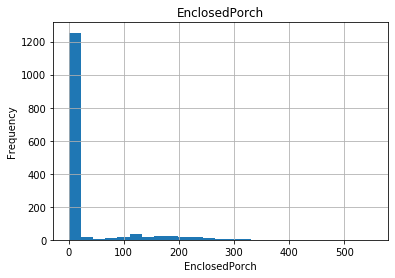

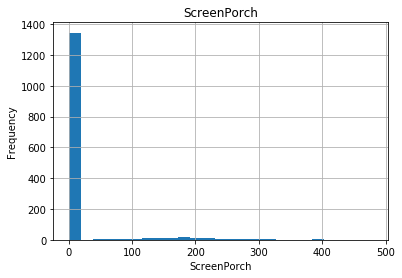

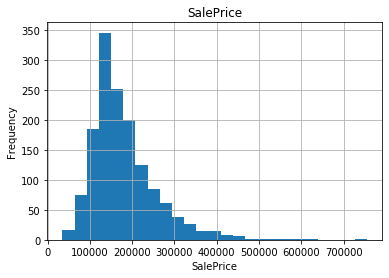

In [15]:
for feat in continuous_feat[1:]:
    dataset[feat].hist(bins=25)
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.title(feat)
    plt.show()

## Detecting Outliers

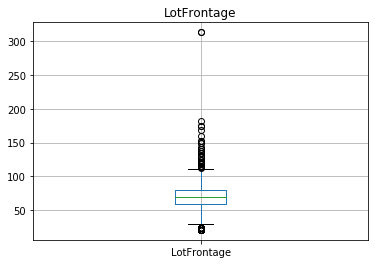

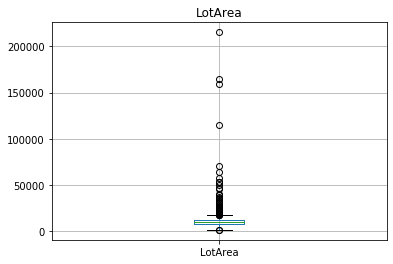

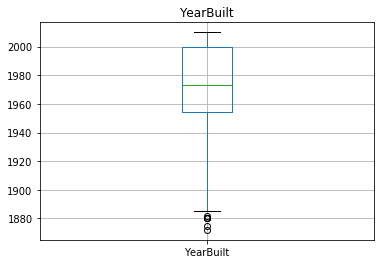

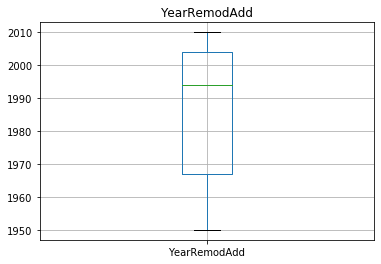

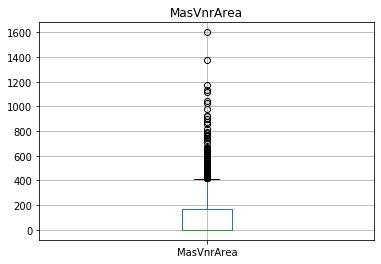

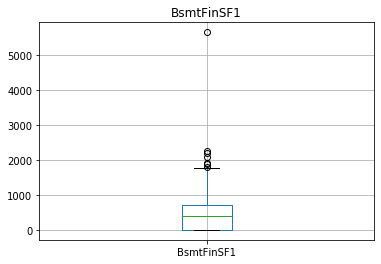

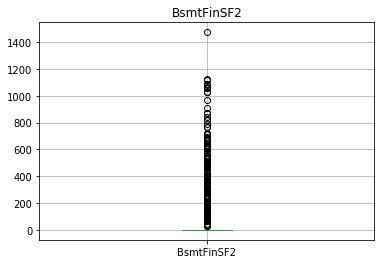

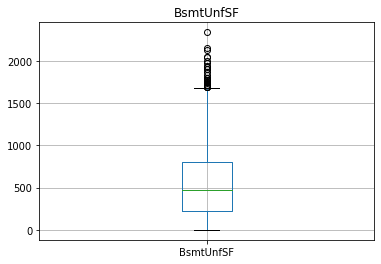

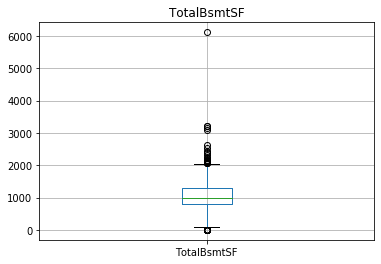

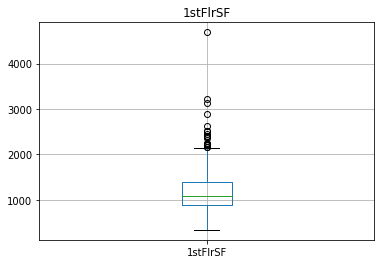

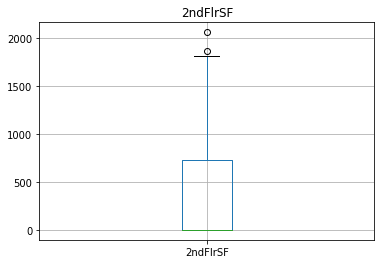

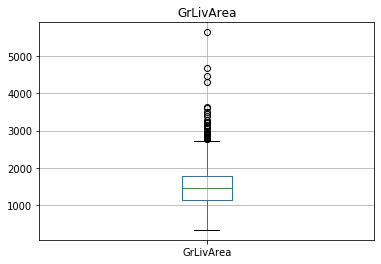

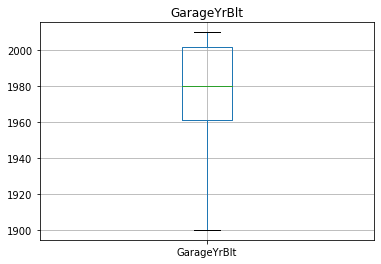

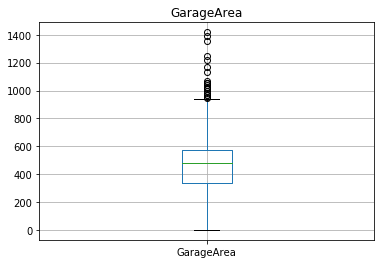

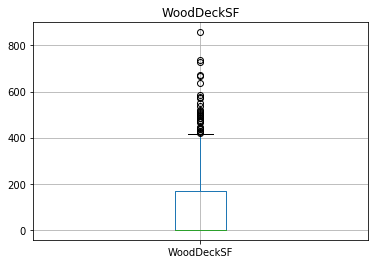

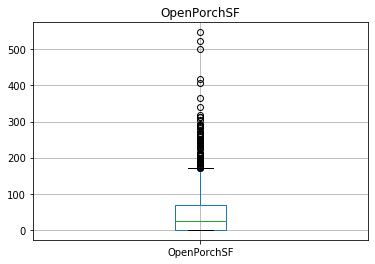

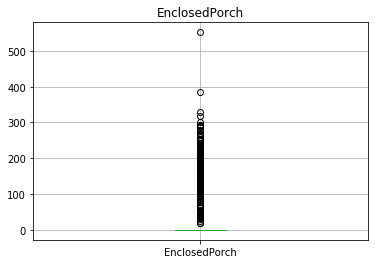

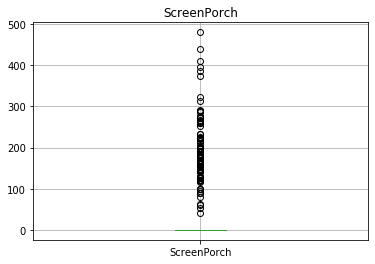

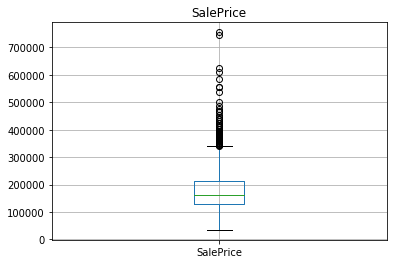

In [16]:
for feat in continuous_feat[1:]:
    dataset.boxplot(column=feat)
    plt.title(feat)
    plt.show()    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [17]:
categorical_feat = [feature for feature in dataset.columns if dataset[feature].dtype=='O']
for feat in categorical_feat:
    print(feat,': cardinality = ',len(dataset[feat].unique()))

MSZoning : cardinality =  5
Street : cardinality =  2
Alley : cardinality =  3
LotShape : cardinality =  4
LandContour : cardinality =  4
Utilities : cardinality =  2
LotConfig : cardinality =  5
LandSlope : cardinality =  3
Neighborhood : cardinality =  25
Condition1 : cardinality =  9
Condition2 : cardinality =  8
BldgType : cardinality =  5
HouseStyle : cardinality =  8
RoofStyle : cardinality =  6
RoofMatl : cardinality =  8
Exterior1st : cardinality =  15
Exterior2nd : cardinality =  16
MasVnrType : cardinality =  5
ExterQual : cardinality =  4
ExterCond : cardinality =  5
Foundation : cardinality =  6
BsmtQual : cardinality =  5
BsmtCond : cardinality =  5
BsmtExposure : cardinality =  5
BsmtFinType1 : cardinality =  7
BsmtFinType2 : cardinality =  7
Heating : cardinality =  6
HeatingQC : cardinality =  5
CentralAir : cardinality =  2
Electrical : cardinality =  6
KitchenQual : cardinality =  4
Functional : cardinality =  7
FireplaceQu : cardinality =  6
GarageType : cardinality 

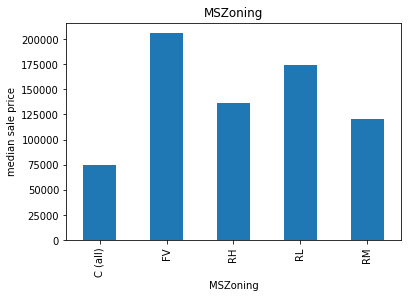

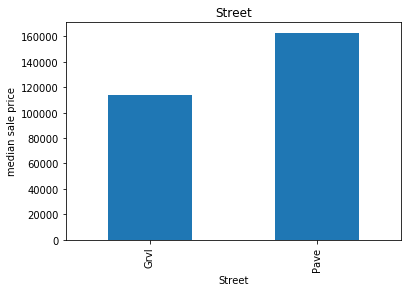

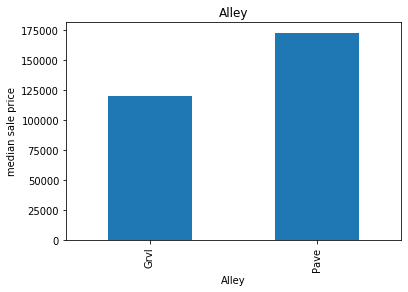

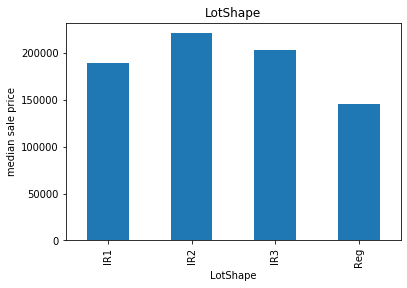

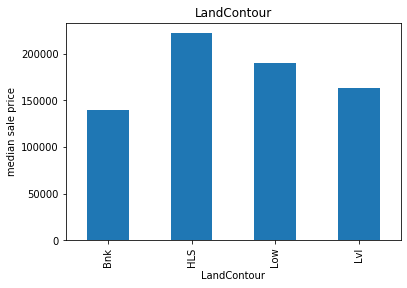

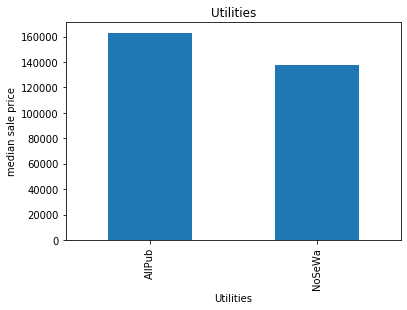

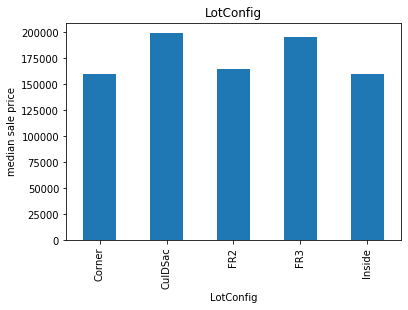

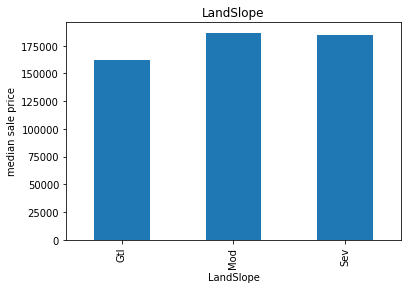

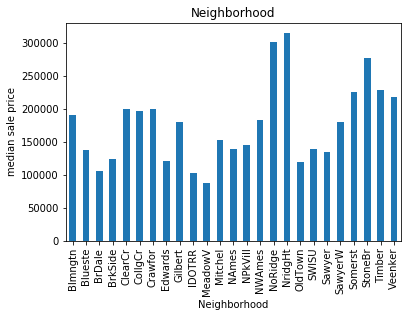

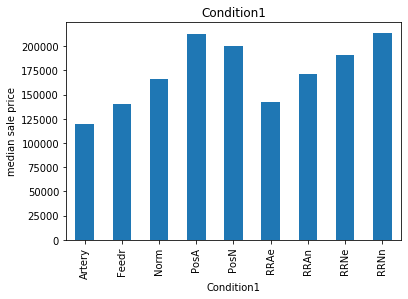

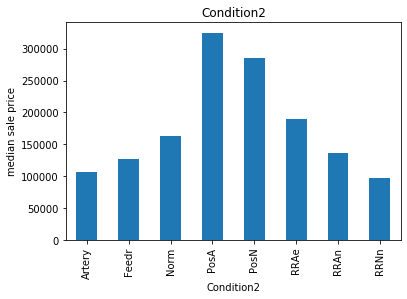

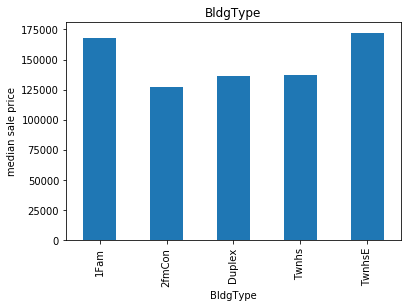

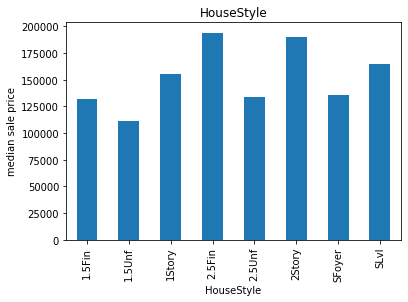

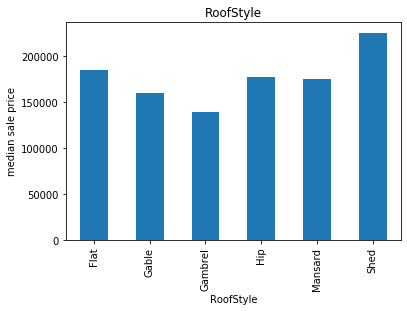

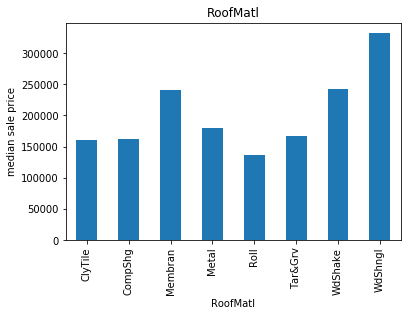

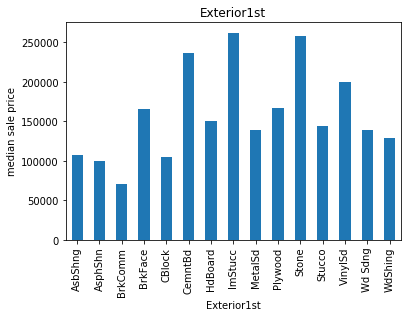

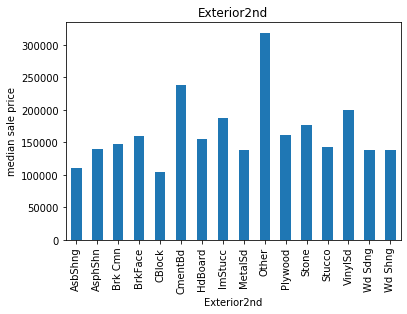

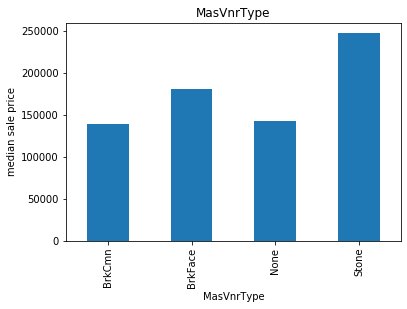

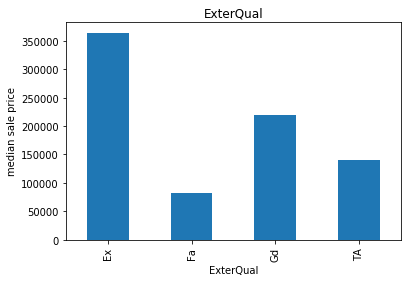

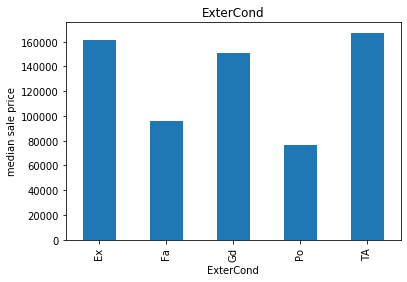

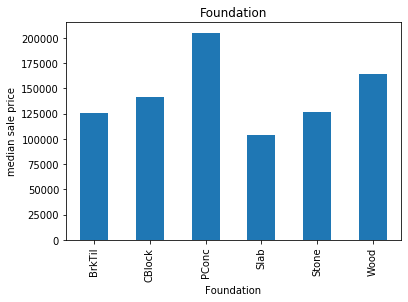

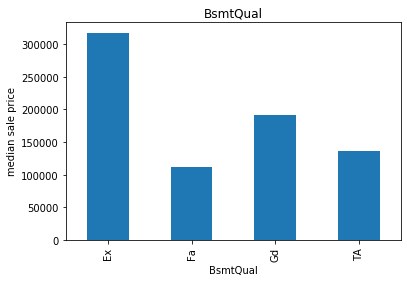

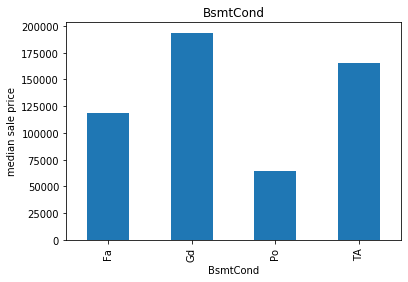

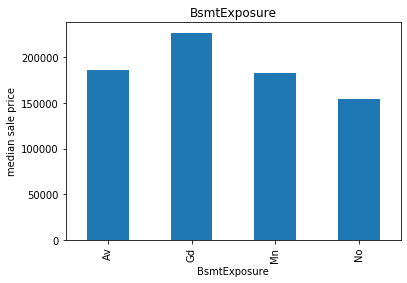

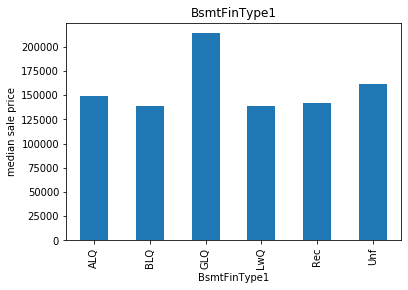

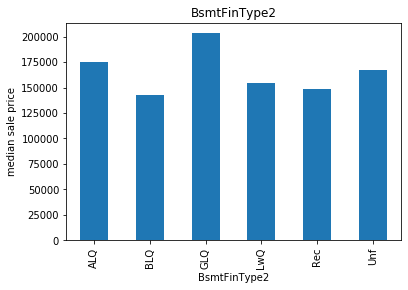

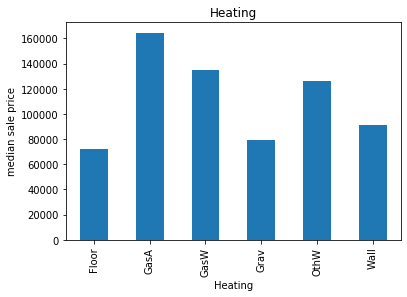

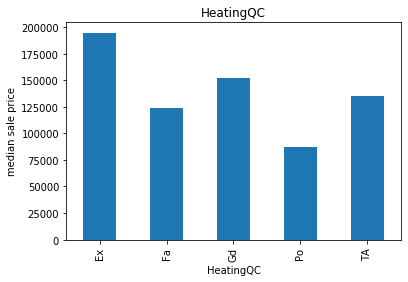

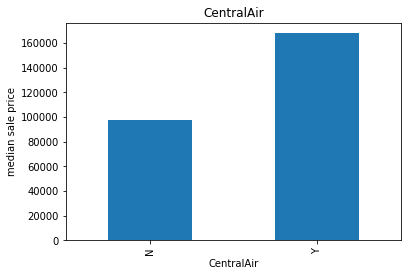

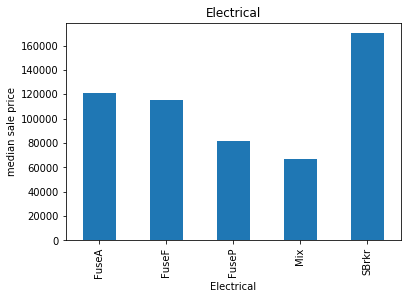

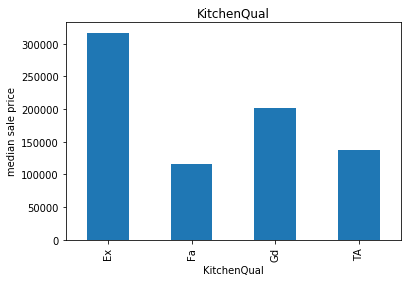

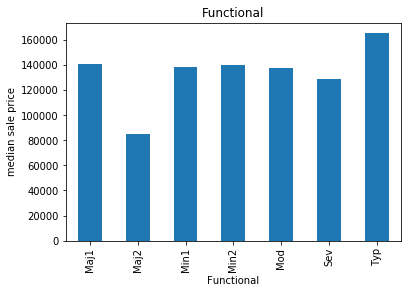

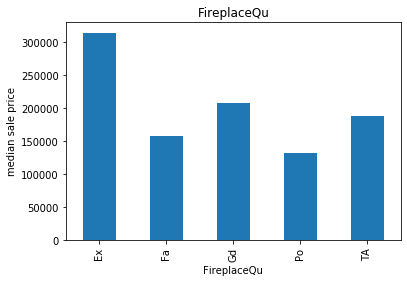

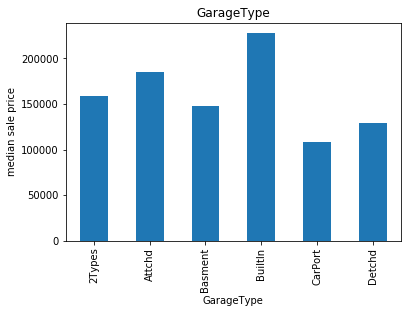

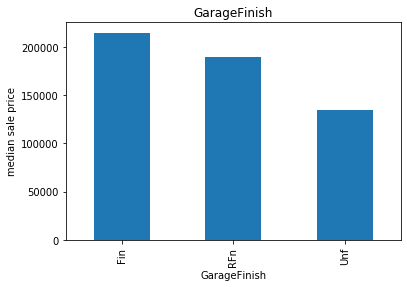

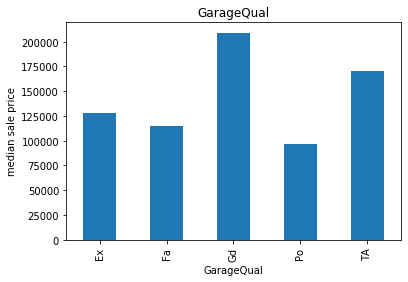

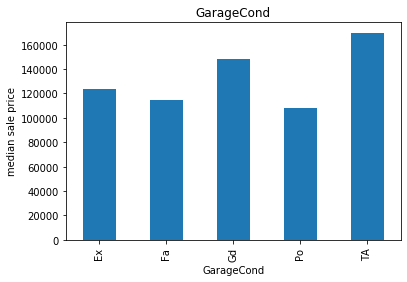

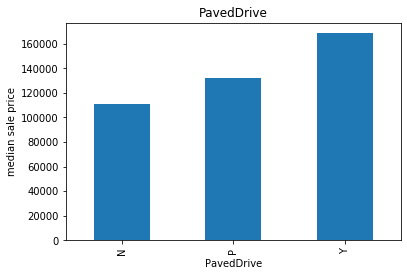

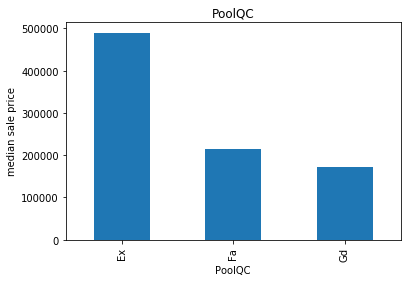

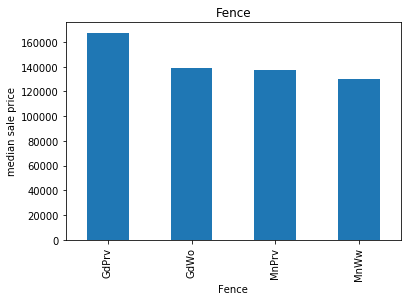

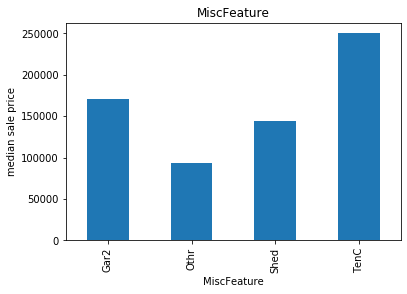

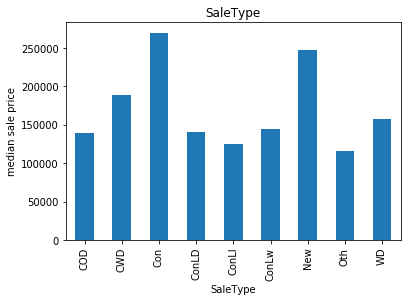

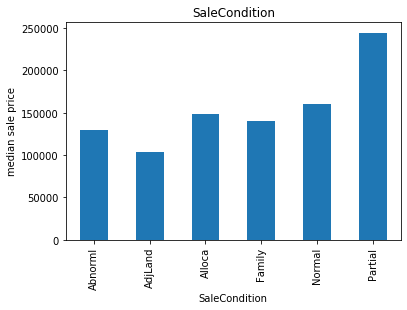

In [18]:
for feat in categorical_feat:
    data1 = dataset.copy()
    data1.groupby(feat)['SalePrice'].median().plot.bar()
    plt.xlabel(feat)
    plt.ylabel('median sale price')
    plt.title(feat)
    plt.show()
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

# Feature Engineering
### 1. Handling Missing Values

In [19]:
numerical_null = [feature for feature in dataset.columns if dataset[feature].dtype!='O' and dataset[feature].isnull().sum()>0]
for feat in numerical_null:
    print(feat,':',dataset[feat].isnull().mean()*100,'% missing values')

LotFrontage : 17.73972602739726 % missing values
MasVnrArea : 0.547945205479452 % missing values
GarageYrBlt : 5.5479452054794525 % missing values


Since, there are not much missing values in numerical features. So, replacing those missing values with median of that feature column and adding a new null feature of 0 & 1 for each feature so that our model gains more informaton.

In [20]:
for feat in numerical_null:
    median_value = dataset[feat].median()
    dataset[feat+'_null'] = np.where(dataset[feat].isnull(),1,0)
    dataset[feat].fillna(median_value,inplace=True)
    
dataset[numerical_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [21]:
categorical_null = [feature for feature in dataset.columns if dataset[feature].dtype=='O' and dataset[feature].isnull().sum()>0]
for feat in categorical_null:
    print(feat,':',dataset[feat].isnull().mean()*100,'% missing values')

Alley : 93.76712328767123 % missing values
MasVnrType : 0.547945205479452 % missing values
BsmtQual : 2.5342465753424657 % missing values
BsmtCond : 2.5342465753424657 % missing values
BsmtExposure : 2.6027397260273974 % missing values
BsmtFinType1 : 2.5342465753424657 % missing values
BsmtFinType2 : 2.6027397260273974 % missing values
Electrical : 0.0684931506849315 % missing values
FireplaceQu : 47.26027397260274 % missing values
GarageType : 5.5479452054794525 % missing values
GarageFinish : 5.5479452054794525 % missing values
GarageQual : 5.5479452054794525 % missing values
GarageCond : 5.5479452054794525 % missing values
PoolQC : 99.52054794520548 % missing values
Fence : 80.75342465753424 % missing values
MiscFeature : 96.30136986301369 % missing values


Dropping features which has more than 90% of missing values

In [22]:
missing90 = [feature for feature in categorical_null if dataset[feature].isnull().mean()*100 > 90]
dataset.drop(missing90,axis=1,inplace=True)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_null,MasVnrArea_null,GarageYrBlt_null
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000,0,0,0


In [23]:
categorical_null = [feature for feature in dataset.columns if dataset[feature].dtype=='O' and dataset[feature].isnull().sum()>0]
for feat in categorical_null:
    print(feat,':',dataset[feat].isnull().mean()*100,'% missing values')

MasVnrType : 0.547945205479452 % missing values
BsmtQual : 2.5342465753424657 % missing values
BsmtCond : 2.5342465753424657 % missing values
BsmtExposure : 2.6027397260273974 % missing values
BsmtFinType1 : 2.5342465753424657 % missing values
BsmtFinType2 : 2.6027397260273974 % missing values
Electrical : 0.0684931506849315 % missing values
FireplaceQu : 47.26027397260274 % missing values
GarageType : 5.5479452054794525 % missing values
GarageFinish : 5.5479452054794525 % missing values
GarageQual : 5.5479452054794525 % missing values
GarageCond : 5.5479452054794525 % missing values
Fence : 80.75342465753424 % missing values


In [24]:
for feat in categorical_null:
    dataset[feat].fillna('Missing',inplace=True)
dataset[feat].isnull().sum()

0

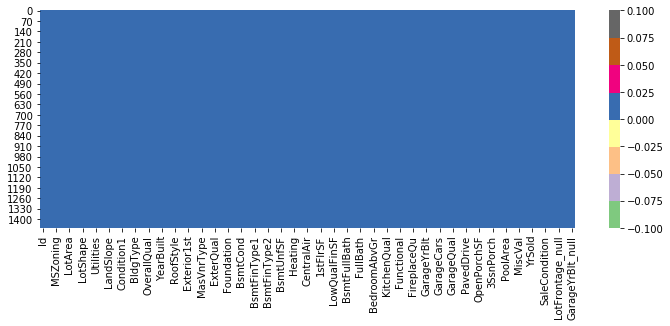

In [25]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(),cmap='Accent')

Handling year features with respect to Yr_Sold

In [26]:
for feat in year_feat:
    if feat != 'YrSold':
        dataset[feat] = dataset['YrSold'] - dataset[feat] 

In [27]:
dataset[year_feat].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


Handling the least frequent categories(i.e; frequency[category] < 1%) in categorical features by labeling them as a new category 'Rare'

In [28]:
categorical_feat = [feature for feature in dataset.columns if dataset[feature].dtype=='O']

for feat in categorical_feat:
    temp = dataset.groupby(feat)['SalePrice'].count()/len(dataset)
    temp_df = temp[temp>0.01].index
    dataset[feat] = np.where(dataset[feat].isin(temp_df),dataset[feat],'Rare')

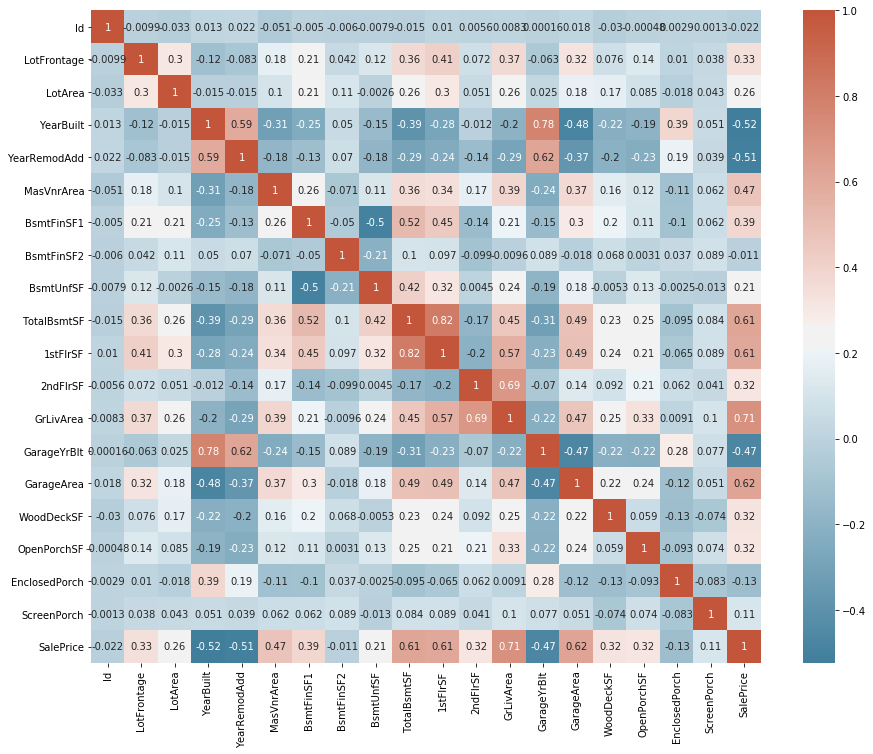

In [29]:
plt.figure(figsize=(15,12))
corr = dataset[continuous_feat].corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True))

Performing log normal distribution of some numerical features to reduce their skewness

In [30]:
log_feat = ['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']
for feat in log_feat:
    dataset[feat] = np.log(dataset[feat])
dataset[log_feat].head()

























































































































































































































































































































,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
0,4.174387,9.041922,6.752270,7.444249,12.247694
1,4.382027,9.169518,7.140453,7.140453,12.109011
2,4.219508,9.328123,6.824374,7.487734,12.317167
3,4.094345,9.164296,6.867974,7.448334,11.849398
4,4.430817,9.565214,7.043160,7.695303,12.429216


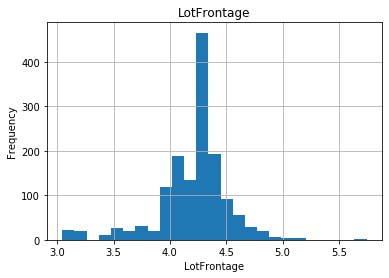

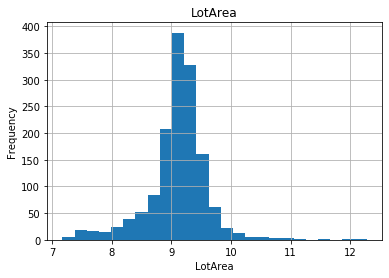

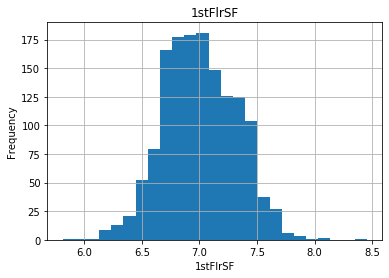

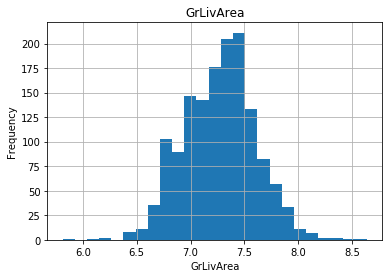

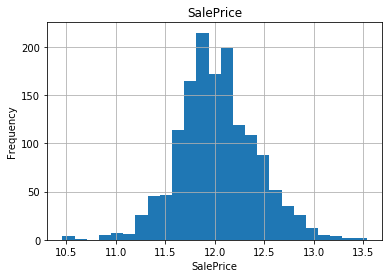

In [31]:
for feat in log_feat:
    dataset[feat].hist(bins=25)
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.title(feat)
    plt.show()

## 2. Handling Outliers

In [32]:
for feat in continuous_feat[1:-1]:
    Q1 = np.percentile(dataset[feat], 25)  
    Q3 = np.percentile(dataset[feat], 75)  
    IQR = Q3 - Q1  
    low_lim = Q1 - 1.5 * IQR 
    up_lim = Q3 + 1.5 * IQR 
    count = 0
    for x in dataset[feat]: 
        if ((x> up_lim) or (x<low_lim)): 
            count += 1
    print(feat,': No of outliers =',count) 

LotFrontage : No of outliers = 123
LotArea : No of outliers = 132
YearBuilt : No of outliers = 8
YearRemodAdd : No of outliers = 0
MasVnrArea : No of outliers = 98
BsmtFinSF1 : No of outliers = 7
BsmtFinSF2 : No of outliers = 167
BsmtUnfSF : No of outliers = 29
TotalBsmtSF : No of outliers = 61
1stFlrSF : No of outliers = 7
2ndFlrSF : No of outliers = 2
GrLivArea : No of outliers = 10
GarageYrBlt : No of outliers = 1
GarageArea : No of outliers = 21
WoodDeckSF : No of outliers = 32
OpenPorchSF : No of outliers = 77
EnclosedPorch : No of outliers = 208
ScreenPorch : No of outliers = 116


In [33]:
for feat in continuous_feat[1:-1]:
    count = 0
    mean = dataset[feat].mean()
    std = dataset[feat].std()
    threshold = 3
    for x in dataset[feat]:
        z_score = (x-mean)/std
        if abs(z_score) > threshold:
            count += 1
    print(feat,': No of outliers =',count)

LotFrontage : No of outliers = 45
LotArea : No of outliers = 33
YearBuilt : No of outliers = 4
YearRemodAdd : No of outliers = 0
MasVnrArea : No of outliers = 32
BsmtFinSF1 : No of outliers = 6
BsmtFinSF2 : No of outliers = 50
BsmtUnfSF : No of outliers = 11
TotalBsmtSF : No of outliers = 10
1stFlrSF : No of outliers = 6
2ndFlrSF : No of outliers = 4
GrLivArea : No of outliers = 8
GarageYrBlt : No of outliers = 2
GarageArea : No of outliers = 7
WoodDeckSF : No of outliers = 22
OpenPorchSF : No of outliers = 27
EnclosedPorch : No of outliers = 51
ScreenPorch : No of outliers = 55


In [34]:
dataset1 = dataset.copy()
for feat in continuous_feat[1:-1]:
    outliers = []
    mean = dataset[feat].mean()
    std = dataset[feat].std()
    threshold = 3
    median = dataset[feat].median()
    for x in dataset[feat]:
        z_score = (x-mean)/std
        if abs(z_score) > threshold:
            outliers.append(x)
    #Replacing outliers with median values
    dataset1[feat] = np.where(dataset1[feat].isin(outliers),median,dataset1[feat])
    

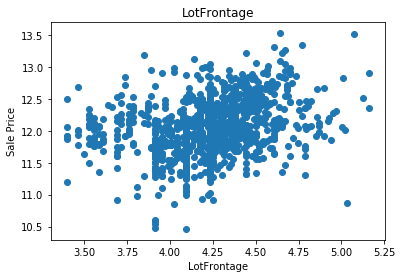

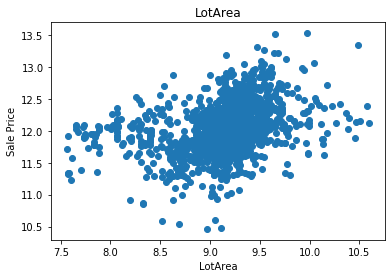

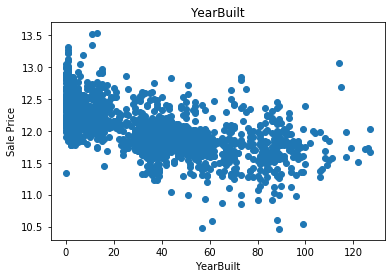

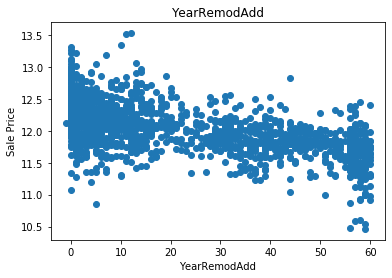

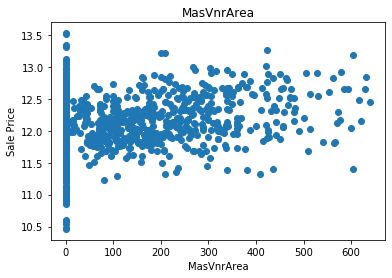

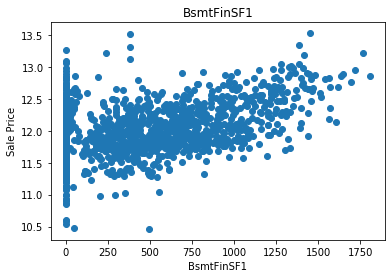

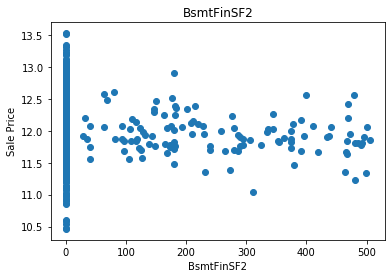

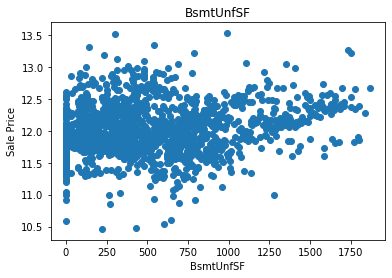

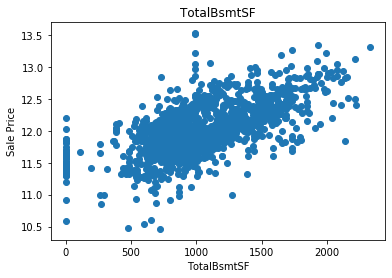

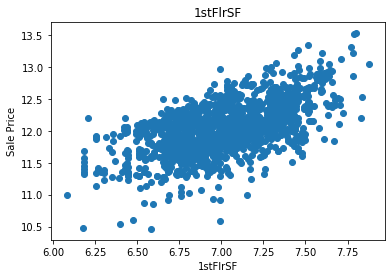

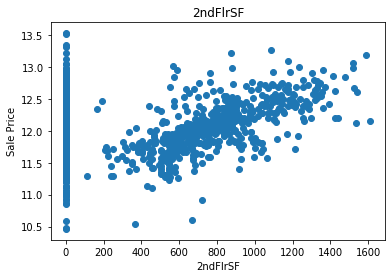

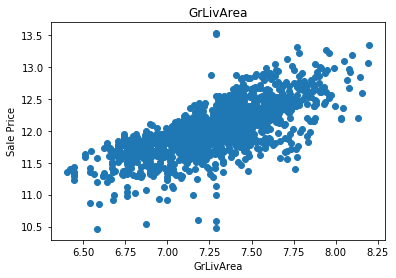

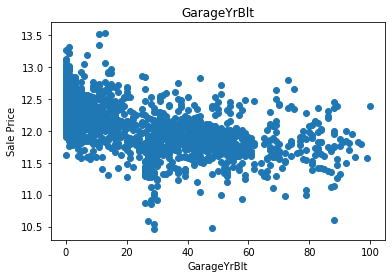

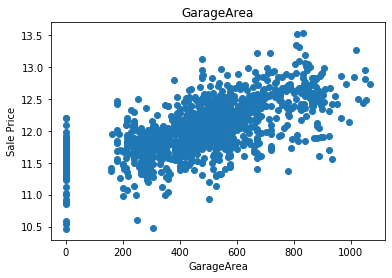

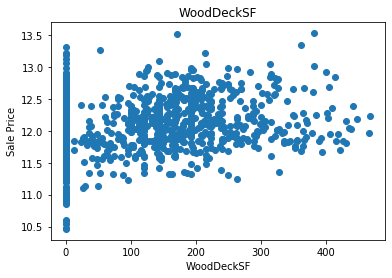

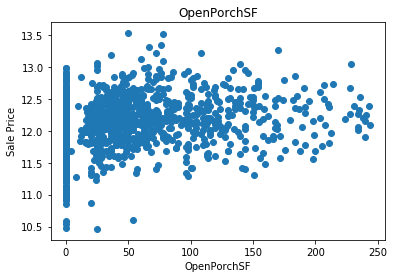

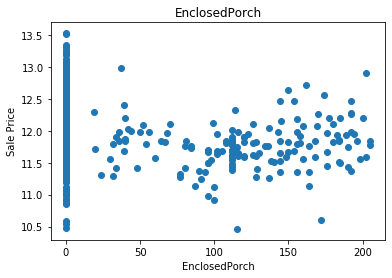

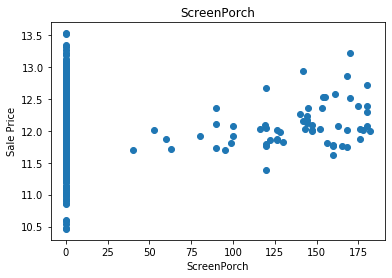

In [35]:
for feat in continuous_feat[1:-1]:
    plt.scatter(dataset1[feat],dataset1['SalePrice'])
    plt.xlabel(feat)
    plt.ylabel('Sale Price')
    plt.title(feat)
    plt.show()

## Encoding of categorical features
Here, three encoding techniques has been tried
1. Label Encoding
2. One Hot Encoding
3. Ordinal Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
dataset_le = dataset1.copy()
categorical_feat = [feature for feature in dataset1.columns if dataset1[feature].dtype=='O']
for feat in categorical_feat:
    dataset_le[feat] = le.fit_transform(dataset1[feat])
dataset_le.head()   

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_null,MasVnrArea_null,GarageYrBlt_null
0,1,60,2,4.174387,9.041922,0,3,3,0,3,0,4,2,0,0,2,7,5,5.0,5.0,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706.0,6,0.0,150.0,856.0,0,0,1,3,6.752270,854.0,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548.0,3,3,2,0.0,61.0,0.0,0,0.0,0,2,0,2,2008,3,2,12.247694,0,0,0
1,2,20,2,4.382027,9.169518,0,3,3,0,2,0,16,1,0,0,1,6,8,31.0,31.0,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,0,1,3,7.140453,0.0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460.0,3,3,2,298.0,0.0,0.0,0,0.0,0,2,0,5,2007,3,2,12.109011,0,0,0
2,3,60,2,4.219508,9.328123,0,0,3,0,3,0,4,2,0,0,2,7,5,7.0,6.0,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486.0,6,0.0,434.0,920.0,0,0,1,3,6.824374,866.0,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608.0,3,3,2,0.0,42.0,0.0,0,0.0,0,2,0,9,2008,3,2,12.317167,0,0,0
3,4,70,2,4.094345,9.164296,0,0,3,0,0,0,5,2,0,0,2,7,5,91.0,36.0,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216.0,6,0.0,540.0,756.0,0,2,1,3,6.867974,756.0,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642.0,3,3,2,0.0,35.0,0.0,0,0.0,0,2,0,2,2006,3,0,11.849398,0,0,0
4,5,60,2,4.430817,9.565214,0,0,3,0,2,0,13,2,0,0,2,8,5,8.0,8.0,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,0,1,3,7.043160,1053.0,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836.0,3,3,2,192.0,84.0,0.0,0,0.0,0,2,0,12,2008,3,2,12.429216,0,0,0


In [41]:
dataset_le.drop(columns=['Id'],inplace=True)
dataset_le.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_null,MasVnrArea_null,GarageYrBlt_null
0,60,2,4.174387,9.041922,0,3,3,0,3,0,4,2,0,0,2,7,5,5.0,5.0,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706.0,6,0.0,150.0,856.0,0,0,1,3,6.752270,854.0,0,7.444249,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548.0,3,3,2,0.0,61.0,0.0,0,0.0,0,2,0,2,2008,3,2,12.247694,0,0,0
1,20,2,4.382027,9.169518,0,3,3,0,2,0,16,1,0,0,1,6,8,31.0,31.0,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,0,0,1,3,7.140453,0.0,0,7.140453,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460.0,3,3,2,298.0,0.0,0.0,0,0.0,0,2,0,5,2007,3,2,12.109011,0,0,0
2,60,2,4.219508,9.328123,0,0,3,0,3,0,4,2,0,0,2,7,5,7.0,6.0,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486.0,6,0.0,434.0,920.0,0,0,1,3,6.824374,866.0,0,7.487734,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608.0,3,3,2,0.0,42.0,0.0,0,0.0,0,2,0,9,2008,3,2,12.317167,0,0,0
3,70,2,4.094345,9.164296,0,0,3,0,0,0,5,2,0,0,2,7,5,91.0,36.0,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216.0,6,0.0,540.0,756.0,0,2,1,3,6.867974,756.0,0,7.448334,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642.0,3,3,2,0.0,35.0,0.0,0,0.0,0,2,0,2,2006,3,0,11.849398,0,0,0
4,60,2,4.430817,9.565214,0,0,3,0,2,0,13,2,0,0,2,8,5,8.0,8.0,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,0,0,1,3,7.043160,1053.0,0,7.695303,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836.0,3,3,2,192.0,84.0,0.0,0,0.0,0,2,0,12,2008,3,2,12.429216,0,0,0


In [42]:
dataset_le['ScreenPorch'] = dataset_le['ScreenPorch'].astype('int32')

## Feature Scaling

In [43]:
dataset_le1 = dataset_le.copy()
from sklearn.preprocessing import MinMaxScaler
feat_scale = [feature for feature in dataset_le1.columns if feature != 'SalePrice']
scaler = MinMaxScaler()
scaler.fit(dataset_le1[feat_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [44]:
df_le1 = pd.concat([dataset_le1['SalePrice'].reset_index(drop=True),
                   pd.DataFrame(scaler.transform(dataset_le1[feat_scale]),columns=feat_scale)],axis=1)
df_le1.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_null,MasVnrArea_null,GarageYrBlt_null
0,12.247694,0.235294,0.5,0.439848,0.487624,0.0,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.039370,0.098361,0.0,0.0,0.8,0.8,0.25,0.306250,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,0.390055,1.0,0.0,0.080257,0.367382,0.0,0.0,1.0,1.0,0.373567,0.530106,0.0,0.580156,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.05,0.666667,0.50,0.512629,1.0,1.0,1.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.5,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,0.0
1,12.109011,0.000000,0.5,0.557968,0.529612,0.0,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.244094,0.524590,0.0,0.0,0.4,0.4,0.50,0.000000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.540331,1.0,0.0,0.151953,0.541631,0.0,0.0,1.0,1.0,0.589986,0.000000,0.0,0.410526,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.31,0.666667,0.50,0.430309,1.0,1.0,1.0,0.636752,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,0.0
2,12.317167,0.235294,0.5,0.465516,0.581803,0.0,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.055118,0.114754,0.0,0.0,0.8,0.8,0.25,0.253125,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.268508,1.0,0.0,0.232210,0.394850,0.0,0.0,1.0,1.0,0.413766,0.537554,0.0,0.604437,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.07,0.666667,0.50,0.568756,1.0,1.0,1.0,0.000000,0.172131,0.0,0.0,0.0,0.0,0.5,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,0.0
3,11.849398,0.294118,0.5,0.394314,0.527893,0.0,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.716535,0.606557,0.0,0.0,0.9,1.0,0.50,0.000000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.119337,1.0,0.0,0.288925,0.324464,0.0,0.5,1.0,1.0,0.438074,0.469274,0.0,0.582437,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.08,1.000000,0.75,0.600561,1.0,1.0,1.0,0.000000,0.143443,0.0,0.0,0.0,0.0,0.5,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,0.0
4,12.429216,0.235294,0.5,0.585724,0.659822,0.0,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.062992,0.147541,0.0,0.0,0.8,0.8,0.25,0.546875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.361878,1.0,0.0,0.262172,0.491416,0.0,0.0,1.0,1.0,0.535743,0.653631,0.0,0.720337,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.08,0.666667,0.75,0.782039,1.0,1.0,1.0,0.410256,0.344262,0.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,0.0


## Feature Selection

In [45]:
y = df_le1['SalePrice']
X = df_le1.drop(['SalePrice'],axis=1)

In [46]:
#Checking Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [47]:
print(sorted(model.feature_importances_,reverse=True))

[0.2760052468478324, 0.12166518531276732, 0.10803493878209149, 0.058059910187826566, 0.0542451501124765, 0.030222920288809973, 0.02735211955228918, 0.02696690894491278, 0.026897345836479295, 0.023963330052641185, 0.01948008288010707, 0.014125412354717619, 0.01238689040743272, 0.012323522506065748, 0.01143443776892748, 0.011252888284400096, 0.01100370746015179, 0.009248359360987534, 0.007326742296816551, 0.007004584920874358, 0.006117370183403031, 0.005550723899486547, 0.005215270769882734, 0.004629053200323301, 0.0045664203593816085, 0.004545298017904524, 0.0043838713855962495, 0.004125383487906985, 0.004018530606497622, 0.003962477000775231, 0.003735259444040785, 0.0036773086179334477, 0.003654126649809189, 0.0031330741988243875, 0.0028831063031108557, 0.002827380059082113, 0.002805684914081374, 0.002701785518508465, 0.002650719016700351, 0.0025828128935236646, 0.002580113352648323, 0.0025615482970223354, 0.002523654093883078, 0.002502358905733529, 0.002329963434529144, 0.002248089507

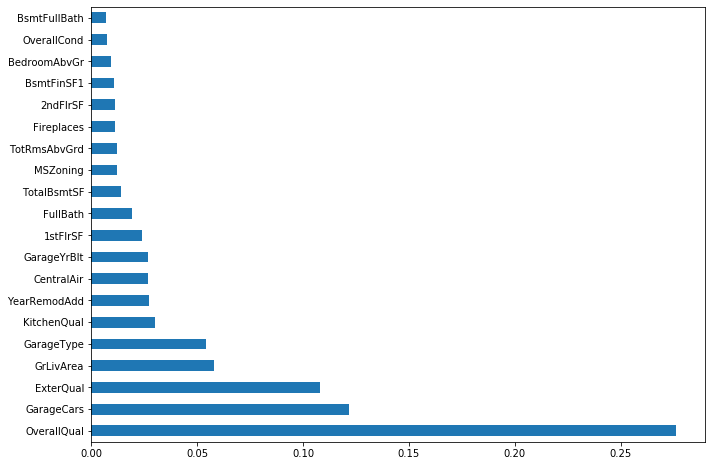

In [48]:
feat_importance = pd.Series(model.feature_importances_,index = X.columns)
plt.figure(figsize=(11,8))
feat_importance.nlargest(20).plot(kind='barh')
plt.show()


































































In [49]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel















In [50]:
feat_select_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feat_select_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [51]:
feat_select_model.get_support()

array([False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [52]:
selected_feat = X.columns[(feat_select_model.get_support())]
print('Total features:',X.shape[1])
print('Selected features:',len(selected_feat))

Total features: 79
Selected features: 25


# Model building

In [56]:
data = pd.read_csv('House_ordinal_nominal.csv')
data.head()

,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtFinSF1,TotalBsmtSF,CentralAir,1stFlrSF,GrLivArea,KitchenQual,GarageFinish,GarageCars,GarageArea,MSZoning_RL,MSZoning_RM,LotShape_Reg,Condition1_Norm,RoofStyle_Hip,MasVnrType_None,Foundation_PConc,BsmtExposure_Gd,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_TA,Functional_Typ,FireplaceQu_Gd,FireplaceQu_Missing,GarageCond_TA,PavedDrive_Y,SaleType_New,SalePrice
0,0.666667,0.098361,0.666667,0.75,0.390055,0.367382,1.0,0.373567,0.580156,0.666667,0.666667,0.50,0.512629,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,12.247694
1,0.555556,0.524590,0.333333,0.75,0.540331,0.541631,1.0,0.589986,0.410526,0.333333,0.666667,0.50,0.430309,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,12.109011
2,0.666667,0.114754,0.666667,0.75,0.268508,0.394850,1.0,0.413766,0.604437,0.666667,0.666667,0.50,0.568756,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,12.317167
3,0.666667,0.606557,0.333333,0.50,0.119337,0.324464,1.0,0.438074,0.582437,0.666667,0.333333,0.75,0.600561,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,11.849398
4,0.777778,0.147541,0.666667,0.75,0.361878,0.491416,1.0,0.535743,0.720337,0.666667,0.666667,0.75,0.782039,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,12.429216


In [57]:
X = data.iloc[:,1:]
y = data['SalePrice']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [78]:
#Using Linear Regression model
lr = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=50)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred = lr.predict(X_test)
print('mean square error:',mean_squared_error(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('r2 score:',r2_score(y_test,y_pred))

mean square error: 1.1584368361601707e-30
mean absolute error: 6.424085008242002e-16
r2 score: 1.0


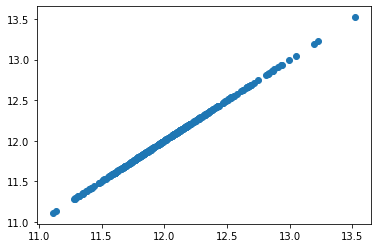

In [68]:
plt.scatter(y_test,y_pred)

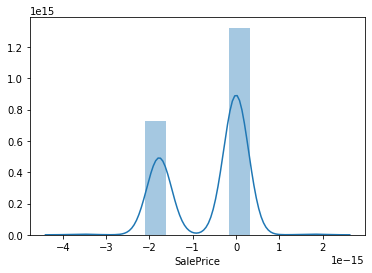

In [69]:
sns.distplot(y_test-y_pred)

In [70]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [71]:
ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-7,1e-3,1e-2,1e-1,1,5,10,20,30,35,40]}
ridge_reg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-07, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [72]:
ridge_reg.best_params_

{'alpha': 1e-15}

In [73]:
y_pred = ridge_reg.predict(X_test)
print('mean square error:',mean_squared_error(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('r2 score:',r2_score(y_test,y_pred))

mean square error: 2.7664163251586166e-30
mean absolute error: 1.2458831531136003e-15
r2 score: 1.0


In [74]:
lasso= Lasso()
params = {'alpha':[1e-15,1e-10,1e-7,1e-3,1e-2,1e-1,1,5,10,20,30,35,40]}
lasso_reg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-07, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [76]:
lasso_reg.best_params_

{'alpha': 1e-07}

In [77]:
y_pred = ridge_reg.predict(X_test)
print('mean square error:',mean_squared_error(y_test,y_pred))
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('r2 score:',r2_score(y_test,y_pred))

mean square error: 2.7664163251586166e-30
mean absolute error: 1.2458831531136003e-15
r2 score: 1.0


In [112]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [67]:
y = dataset_le['SalePrice']
X = dataset_le.drop(['SalePrice'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X[selected_feat],y,test_size=0.25,random_state=0)

In [113]:
#Hyperparameter tuning using RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=100,stop=1500,num=15)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,40,8)]
min_samples_split = [2,5,10,15,20,100]
min_samples_leaf = [1,2,5,10]

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [116]:
model = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring='neg_mean_squared_error',
                          n_iter=10,cv=5,verbose=2,random_state=40,n_jobs=1)

In [117]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.5s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.2s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.7s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.6s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   5.4s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   8.6s
[CV] n_estimators=500, min_samples_split=2, m

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=  18.8s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=  17.9s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=  18.0s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=  20.4s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=  20.7s
[CV] n_estimators=700, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [118]:
model.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [119]:
y_pred = model.predict(X_test)

mean square error: 0.020389438693260296
r2 score: 0.8792851988115417


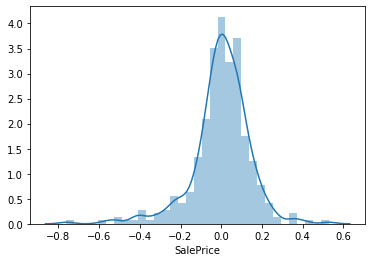

In [120]:
print('mean square error:',mean_squared_error(y_test,y_pred))
print('r2 score:',r2_score(y_test,y_pred))
sns.distplot(y_test-y_pred)

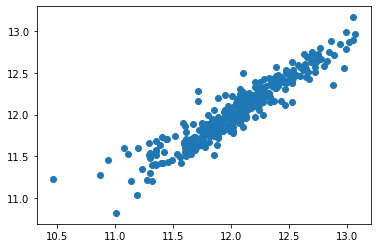

In [121]:
plt.scatter(y_test,y_pred)